In [1]:
import nomic

In [2]:
nomic.login("nk-2LSEn5FB5h04Dn0pFLuZ9jDw7ZaMbPpYPV88wbKKASc")

In [3]:
from nomic import AtlasDataset


In [4]:
dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-05-29')
#dataset.maps[0].embeddings.latent.shape

2024-05-30 10:24:21.145 | INFO     | nomic.dataset:__init__:829 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-05-29`.


In [5]:
map = dataset.maps[0]

In [6]:
df=map.data.df

100%|██████████| 129/129 [00:00<00:00, 27761.17it/s]


In [7]:
embeddings=map.embeddings.df
embeddings

,tweetId,x,y
0,902255139272187904,-27.761618,-4.659249
1,1262847730118021120,-7.039828,-14.346349
2,555017655409971200,15.819175,-13.821932
3,1701297170295496741,3.841781,-41.170456
4,280797821186224128,9.237099,-17.942303
...,...,...,...
3037311,1181949986273157120,18.082239,21.329554
3037312,1207362886697394176,21.938051,19.185106
3037313,1194677241411715072,19.749821,19.779804
3037314,1192907957182377984,21.129927,20.267357


In [8]:
import pandas as pd
merged_df = df.merge(embeddings, on='tweetId')
merged_df

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,x,y
0,Deb Fischer R-NE,R,senatorfischer,2017_2018,Senate,NE,2017-08-28 19:42:42.949,PolitWoops,902255139272187904,-27.761618,-4.659249
1,Michael Waltz R-FL,R,repmichaelwaltz,2019_2020,House,FL,2020-05-19 20:48:56.093,PolitWoops,1262847730118021120,-7.039828,-14.346349
2,Dean Heller R-NV,R,sendeanheller,2015_2016,Senate,NV,2015-01-13 15:04:55.436,PolitWoops,555017655409971200,15.819175,-13.821932
3,"Braun, Mike",R,senatorbraun,N/A,Senate,IN,2023-09-11 18:10:28.000,NOMIC,1701297170295496741,3.841781,-41.170456
4,Lynn Jenkins R-KS,R,replynnjenkins,2011_2012,House,KS,2012-12-17 22:13:12.199,PolitWoops,280797821186224128,9.237099,-17.942303
...,...,...,...,...,...,...,...,...,...,...,...
3037311,Andy Biggs R-AZ,R,repandybiggsaz,2019_2020,House,AZ,2019-10-09 15:10:10.953,PolitWoops,1181949986273157120,18.082239,21.329554
3037312,Debbie Lesko R-AZ,R,repdlesko,2019_2020,House,AZ,2019-12-18 18:11:58.563,PolitWoops,1207362886697394176,21.938051,19.185106
3037313,Russ Fulcher R-ID,R,reprussfulcher,2019_2020,House,ID,2019-11-13 18:03:45.039,PolitWoops,1194677241411715072,19.749821,19.779804
3037314,Andy Barr R-KY,R,repandybarr,2019_2020,House,KY,2019-11-08 20:53:14.807,PolitWoops,1192907957182377984,21.129927,20.267357


In [9]:
extracted_df = merged_df[['name', 'party', 'chamber', 'state']]
unique_extracted_df = extracted_df.drop_duplicates()
unique_extracted_df

,name,party,chamber,state
0,Deb Fischer R-NE,R,Senate,NE
1,Michael Waltz R-FL,R,House,FL
2,Dean Heller R-NV,R,Senate,NV
3,"Braun, Mike",R,Senate,IN
4,Lynn Jenkins R-KS,R,House,KS
...,...,...,...,...
170982,Kyrsten Sinema D-AZ,D,Senate,AZ
219573,"Moulton, Seth",D,House,MA
283808,"Mann, Tracey",R,House,KS
1495228,Byron Donalds R-FL,R,House,FL


In [10]:
grouped_df = merged_df.groupby('name').mean()[['x', 'y']]
grouped_df = grouped_df.rename(columns={'x': 'mean_x', 'y': 'mean_y'})
grouped_df
merged_data = pd.merge(grouped_df, unique_extracted_df, on='name')
merged_data


,name,mean_x,mean_y,party,chamber,state
0,Bernard Sanders I-VT,7.896397,8.795512,I,Senate,VT
1,Vicky Hartzler R-MO,0.249323,-2.423191,R,House,MO
2,John Larson D-CT,-0.081224,3.289591,D,House,CT
3,Mike Rogers R-AL,1.815085,-4.985898,R,House,AL
4,Lois Capps D-CA,-0.561455,-3.740976,D,House,CA
...,...,...,...,...,...,...
1166,"Smith, Adam",-3.527108,2.467215,D,House,WA
1167,"Luetkemeyer, Blaine",-4.149225,0.222387,R,House,MO
1168,"Harder, Josh",-9.458915,-11.089453,D,House,CA
1169,"Sewell, Terri A.",-4.996745,-9.269362,D,House,AL


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


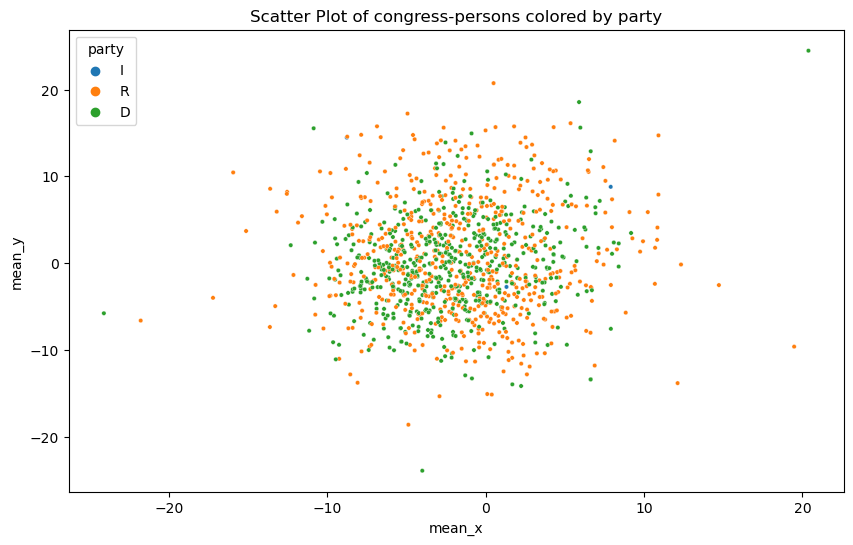

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='mean_x', y='mean_y', hue='party', s=10)
plt.xlabel('mean_x')
plt.ylabel('mean_y')
plt.title('Scatter Plot of congress-persons colored by party')
plt.show()

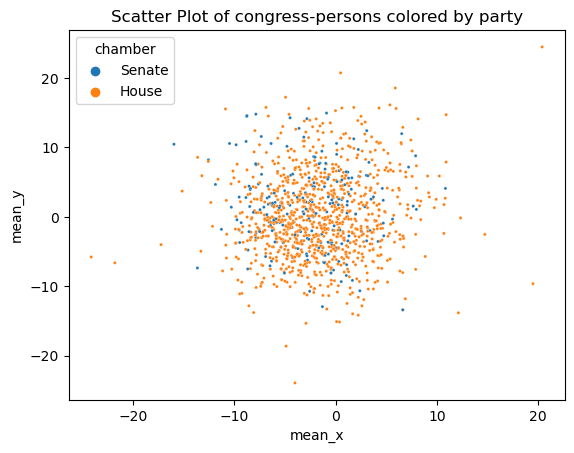

In [13]:
sns.scatterplot(data=merged_data, x='mean_x', y='mean_y', hue='chamber', s=5)
plt.xlabel('mean_x')
plt.ylabel('mean_y')
plt.title('Scatter Plot of congress-persons colored by party')
plt.show()

In [79]:

fddd=merged_data

In [80]:
import numpy as np
from nomic import atlas
fddd = fddd.rename(columns={'mean_x': 'meanx', 'mean_y': 'meany'})
fddd

,name,meanx,meany,party,chamber,state
0,Bernard Sanders I-VT,7.896397,8.795512,I,Senate,VT
1,Vicky Hartzler R-MO,0.249323,-2.423191,R,House,MO
2,John Larson D-CT,-0.081224,3.289591,D,House,CT
3,Mike Rogers R-AL,1.815085,-4.985898,R,House,AL
4,Lois Capps D-CA,-0.561455,-3.740976,D,House,CA
...,...,...,...,...,...,...
1166,"Smith, Adam",-3.527108,2.467215,D,House,WA
1167,"Luetkemeyer, Blaine",-4.149225,0.222387,R,House,MO
1168,"Harder, Josh",-9.458915,-11.089453,D,House,CA
1169,"Sewell, Terri A.",-4.996745,-9.269362,D,House,AL


In [81]:
fddd=fddd.reset_index()
fddd

,index,name,meanx,meany,party,chamber,state
0,0,Bernard Sanders I-VT,7.896397,8.795512,I,Senate,VT
1,1,Vicky Hartzler R-MO,0.249323,-2.423191,R,House,MO
2,2,John Larson D-CT,-0.081224,3.289591,D,House,CT
3,3,Mike Rogers R-AL,1.815085,-4.985898,R,House,AL
4,4,Lois Capps D-CA,-0.561455,-3.740976,D,House,CA
...,...,...,...,...,...,...,...
1166,1166,"Smith, Adam",-3.527108,2.467215,D,House,WA
1167,1167,"Luetkemeyer, Blaine",-4.149225,0.222387,R,House,MO
1168,1168,"Harder, Josh",-9.458915,-11.089453,D,House,CA
1169,1169,"Sewell, Terri A.",-4.996745,-9.269362,D,House,AL


In [82]:
atlas.map_data(data=fddd,
                         embeddings=fddd.loc[:, 'meanx':'meany'].to_numpy(),
                         id_field='index')

2024-05-29 21:49:14.324 | INFO     | nomic.dataset:_create_project:918 - Creating dataset `diffident-becquerel`
2024-05-29 21:49:14.690 | INFO     | nomic.atlas:map_data:110 - Uploading data to Atlas.
2024-05-29 21:49:14.699 | WARNING  | nomic.dataset:_validate_and_correct_arrow_upload:340 - id_field is not a string. Converting to string from int32
1it [00:00,  1.28it/s]
2024-05-29 21:49:15.484 | INFO     | nomic.dataset:_add_data:1597 - Upload succeeded.
2024-05-29 21:49:15.486 | INFO     | nomic.atlas:map_data:125 - `chentianyirucjhu/diffident-becquerel`: Data upload succeeded to dataset`
2024-05-29 21:49:15.847 | WARNING  | nomic.dataset:create_index:1164 - You did not specify the `topic_label_field` option in your topic_model, your dataset will not contain auto-labeled topics.
2024-05-29 21:49:16.896 | INFO     | nomic.dataset:create_index:1301 - Created map `diffident-becquerel` in dataset `chentianyirucjhu/diffident-becquerel`: https://atlas.nomic.ai/data/chentianyirucjhu/diffide

AtlasDataset: <{'id': 'b47c27a3-96a9-419f-88b0-483a135dcba8', 'owner': 'e166a022-44a6-4228-ad5c-46222294e097', 'project_name': 'diffident-becquerel', 'creator': 'google-oauth2|110601383826613173732', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['name', 'meanx', 'meany', 'party', 'chamber', 'state', '_embeddings', 'index'], 'unique_id_field': 'index', 'modality': 'embedding', 'total_datums_in_project': 1171, 'created_timestamp': '2024-05-30T01:49:14.053018+00:00', 'slug': 'diffident-becquerel', 'atlas_indices': [{'id': 'f1cb0d10-6093-4563-b089-285af31997eb', 'project_id': 'b47c27a3-96a9-419f-88b0-483a135dcba8', 'index_name': 'diffident-becquerel', 'indexed_field': None, 'created_timestamp': '2024-05-30T01:49:16.080492+00:00', 'updated_timestamp': '2024-05-30T01:49:16.080492+00:00', 'atoms': ['embedding'], 'colorable_fields': ['name', 'meanx', 'meany', 'party', 'chamber', 'state'], 'embedders': [], 'nearest_neighbor_indices': [{'id': 'e59cb1d3-1209-4fd2-96bf-bcc8dd8fd54a', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['embedding']}], 'projections': [{'id': 'be17c670-3733-4284-bf33-aa2f27d4acb3', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.0, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 5, 'n_init_epochs': 20, 'local_neighborhood_size': 15}, 'atom_strategies': ['embedding'], 'created_timestamp': '2024-05-30T01:49:16.092834+00:00', 'updated_timestamp': '2024-05-30T01:49:16.092834+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/b47c27a3-96a9-419f-88b0-483a135dcba8/be17c670-3733-4284-bf33-aa2f27d4acb3/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/b47c27a3-96a9-419f-88b0-483a135dcba8/be17c670-3733-4284-bf33-aa2f27d4acb3/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'schema': '/////1ACAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAAIAAAAFAAAAAoAAABwcm9qZWN0X2lkAAAkAAAAYjQ3YzI3YTMtOTZhOS00MTlmLTg4YjAtNDgzYTEzNWRjYmE4AAAAAAgAAACUAQAAUAEAACABAAD0AAAAyAAAAJwAAAAwAAAABAAAAJz+//8AAAEFEAAAABgAAAAEAAAAAAAAAAUAAABpbmRleAAAAIz+///E/v//AAABEBQAAAAoAAAABAAAAAEAAAAkAAAACwAAAF9lbWJlZGRpbmdzAAAABgAIAAQABgAAAAIAAAAA////AAABAxAAAAAYAAAABAAAAAAAAAAEAAAAaXRlbQAAAAAy////AAABACz///8AAAEFEAAAABgAAAAEAAAAAAAAAAUAAABzdGF0ZQAAABz///9U////AAABBRAAAAAYAAAABAAAAAAAAAAHAAAAY2hhbWJlcgBE////fP///wAAAQUQAAAAGAAAAAQAAAAAAAAABQAAAHBhcnR5AAAAbP///6T///8AAAEDEAAAABgAAAAEAAAAAAAAAAUAAABtZWFueQAAANb///8AAAEA0P///wAAAQMQAAAAHAAAAAQAAAAAAAAABQAAAG1lYW54AAYACAAGAAYAAAAAAAEAEAAUAAgABgAHAAwAAAAQABAAAAAAAAEFEAAAABwAAAAEAAAAAAAAAAQAAABuYW1lAAAAAAQABAAEAAAA', 'organization_slug': 'chentianyirucjhu', 'organization_name': 'johns-hopkins', 'creator_nickname': 'chentianyirucjhu', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJglMAhtGPsoNVRaEf8umzKCD142m3BNr-WIbfeX318BqQ9djR0=s96-c'}>